# One-Dimensional Climate Models: Brown Dwarfs w/ Chemical Equilibrium and Resort-Rebin

In this tutorial you will learn how to run 1d climate models with chemical equilibrium but using resort rebin instead of the pre-weighted chemeq tables. 


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import picaso.justdoit as jdi
import picaso.justplotit as jpi
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from astropy import constants as const
from astropy import units as u
import sys
import pandas as pd

## Setting up Initial Run (highlighting main differences for resort-rebin)

In this case becuase we're mixing the gases on the fly, we don't need to define the correlated-k database/file. As you can see here in opannection, the method is now set to `resortrebin`. We've defined a list of gases to mix here but if you don't define anything all gasses will be mixed. For more information about the difference between these two methods, you can look at the [Fun with Chem notebook]()

In [ ]:
sonora_profile_db = '/Users/nbatalh1/Documents/data/sonora_bobcat/structures_m+0.0' #recommended download #2 above

gases_fly = ['CO','CH4','H2O','NH3','CO2','N2','HCN','H2','He','PH3','C2H2','Na','K','TiO','VO','FeH']

#change opacity connection 
opacity_ck = jdi.opannection(method='resortrebin',preload_gases=gases_fly) # grab your opacities


In [3]:
cl_run = jdi.inputs(calculation="browndwarf", climate = True) # start a calculation


tint= 700 
grav = 316 # Gravity of your Planet in m/s/s

cl_run.gravity(gravity=grav, gravity_unit=u.Unit('m/(s**2)')) # input gravity
cl_run.effective_temp(tint) # input effective temperature

nlevel = 91 


We recommend starting with Sonora-Bobcat models as an initial guess. 

In [4]:
pressure,temp_guess = np.loadtxt(jdi.os.path.join(
                            sonora_profile_db,f"t{tint}g{grav}nc_m0.0.dat"),
                            usecols=[1,2],unpack=True, skiprows = 1)


nofczns = 1 # number of convective zones initially. Let's not play with this for now.

nstr_upper = 79 # top most level of guessed convective zone
nstr_deep = nlevel -2 # this is always the case. Dont change this
nstr = np.array([0,nstr_upper,89,0,0,0]) # initial guess of convective zones

# Here are some other parameters needed for the code.
rfacv = 0.0 #we are focused on a brown dwarf so let's keep this as is

In comparison to when running climate models with the preweighted ck tables, those we already defined the metallicity and C/O ratio in the format of the table files. Here since we're not using those tables, we need to define the metallicity and C/O ratio along with the type of chemistry we want to do. 

**New Parameters** 

`mh` : this is the metallicity **relative** to solar

`cto_relative` : C/O **relative** to solar OR `cto_absolute` which makes it the actual C/O value

`chem_method` : This will tell PICASO what kind of chemistry you want. The 3 options are `visscher`, `visscher_1060`, and `photochem`. 

The difference between `visscher` and `visscher_1060` are the grid points used with `visscher` having the most updated chemistry as well. We will get into `photochem` in another notebook doing photochemistry.

You **MUST** include the `mh` and one of the `cto...` inputs when doing the `visscher` and `visscher_1060` method.

In [ ]:
cl_run.inputs_climate(temp_guess= temp_guess, pressure= pressure,
                        nstr = nstr, nofczns = nofczns , rfacv = rfacv)

mh=1
cto_relative = 1 

#now that we are not using preweighted ck tables we need to tell picaso how to compute chemistry on the fly 
cl_run.atmosphere(mh=mh, cto_relative=cto_relative, chem_method='visscher')

In [6]:
out = cl_run.climate(opacity_ck, save_all_profiles = True, with_spec=True)

SUMMARY
-------
Clouds: False
quench False
cold_trap False
vol_rainout False
no_ph3 False
Moist Adiabat: False
Iteration number  0 , min , max temp  234.89099914770745 2710.2202248496865 , flux balance  -0.128332994941577
Iteration number  1 , min , max temp  238.53381977274134 2715.702993986178 , flux balance  -0.10231940933762002
Iteration number  2 , min , max temp  242.07362702278343 2721.3165643510742 , flux balance  -0.07539865238579284
Iteration number  3 , min , max temp  245.52369108584193 2727.06801870182 , flux balance  -0.04754701660643165
Iteration number  4 , min , max temp  248.89648486450838 2732.9639774309085 , flux balance  -0.01874184595364149
Iteration number  5 , min , max temp  250.99605542742543 2736.8095293600823 , flux balance  3.171952597177193e-05
Iteration number  6 , min , max temp  251.00856079143088 2736.8101312693434 , flux balance  2.2923081693668616e-07
In t_start: Converged Solution in iterations  6
Big iteration is  251.00856079143088 0
 We are alrea

## Compare Resort-rebin and Pre-weighted CK table derived Climate Profiles

Now we can compare how these two methods perform against one another

Text(0.5, 0, 'Temperature [K]')

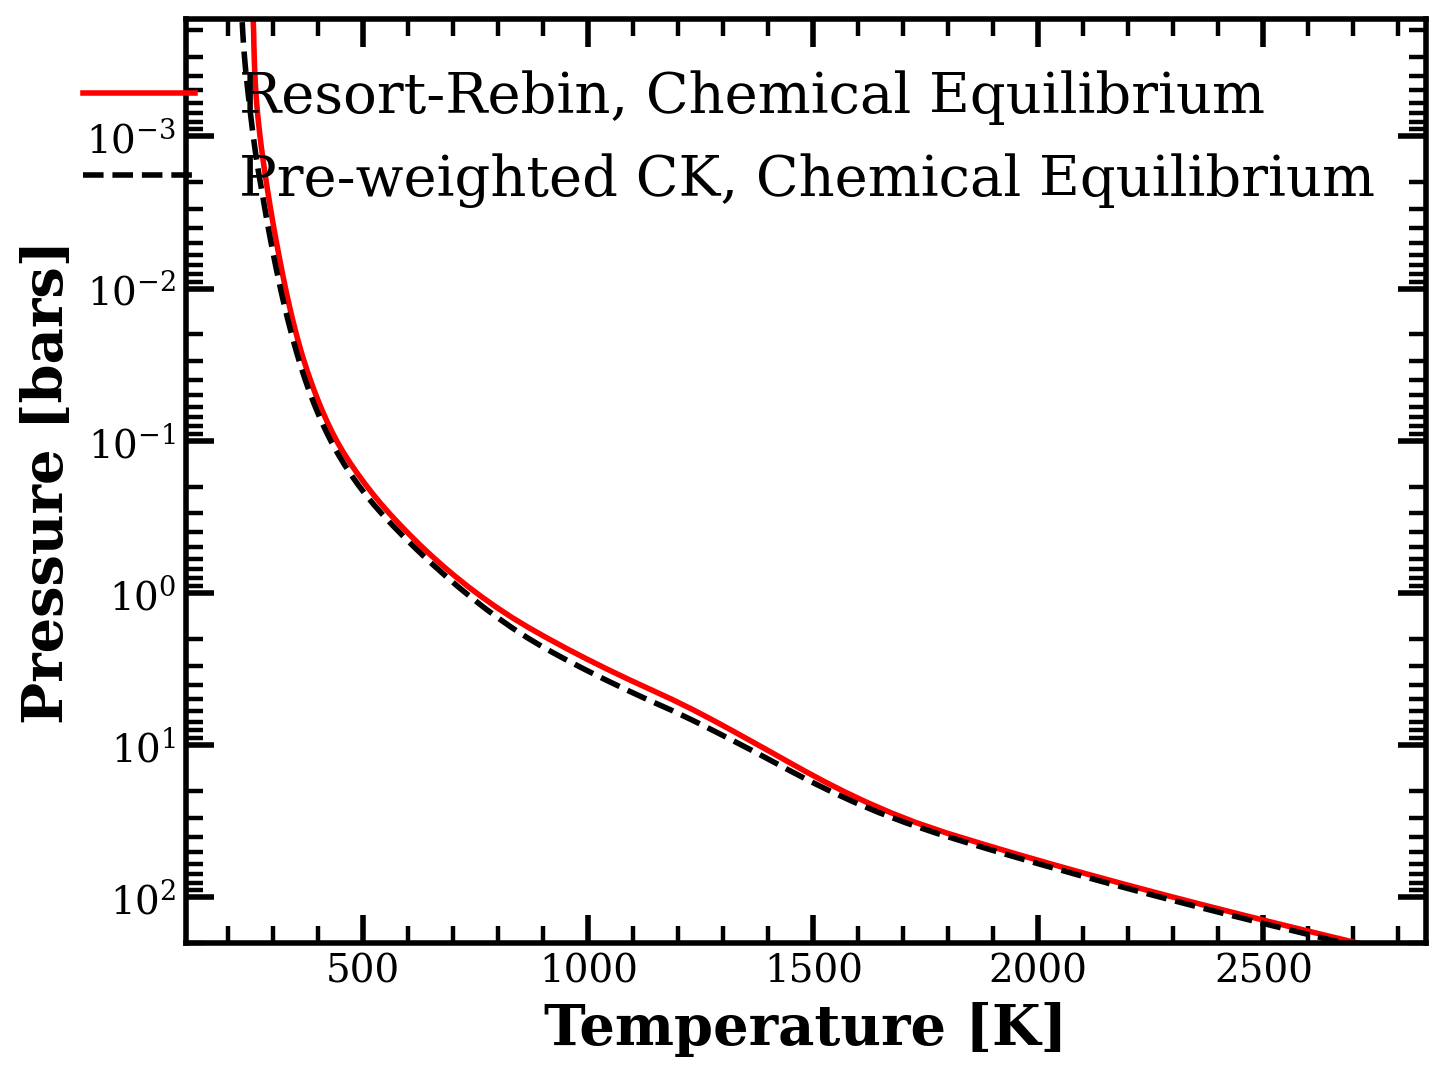

In [7]:
plt.ylim(200,1.7e-4)
plt.semilogy(out['temperature'],out['pressure'],"r", label='Resort-Rebin, Chemical Equilibrium')
plt.semilogy(temp_guess,pressure,color="k",linestyle="--", label='Pre-weighted CK, Chemical Equilibrium')
plt.legend()
plt.ylabel('Pressure [bars]')
plt.xlabel('Temperature [K]')